# SI 618: Introduction to Machine Learning

Version 2022.03.07.1.CT

We suggest you use extra markdown blocks or code comments to record your notes.

In [227]:
import pandas as pd

Seaborn (and other packages) come bundled with datasets.  Let's load the infamous Fisher's Iris Dataset:

In [228]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [229]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exercise 1:
Create a 2-d scatterplot of petal_width (on the y-axis) vs. petal_length (on the x-axis) that includes a regression line.

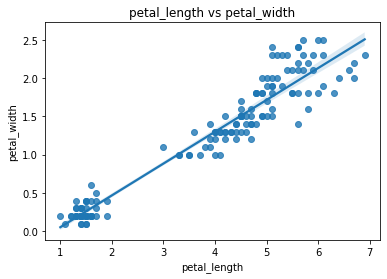

In [230]:
ax = sns.regplot(x=iris['petal_length'], y=iris['petal_width'])
_ = ax.set_title('petal_length vs petal_width')

### Exercise 2:
Create a regression model of petal_width as the outcome variable and petal_length as the explanatory variable.  You might find the notebook on correlation and regression to be helpful here.

In [231]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [232]:
import statsmodels.formula.api as smf

In [233]:
smf.ols('petal_width ~ petal_length', data=iris).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           4.68e-86
Time:                        09:20:03   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3631      0.040     -9.131      0.000      -0.442      -0.285
petal_length     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Introduction to scikit-learn

Recall the general process for using a scikit-learn estimator:
1. choose appropriate class that implements what you want to do and import it
1. choose model hyperparameters (or accept default ones, but be careful) and instantiate class
1. arrange data into features and labels
1. .fit() your model to the data
1. apply model to new data with .predict() for supervised learning

Let's do that with the regression model we implemented using statsmodels above:



## 1. choose appropriate class that implements what you want to do and import it

This takes a bit of experience to figure out, but we'll cover the common ones over the next few classes.  For now, I'll tell you that we want to use sklearn.linear_model.LinearRegression.  Import only that class into your default namespace:

### Exercise 3: write the correct line to import LinearRegression from the sklearn.linear_model module:

In [234]:
from sklearn.linear_model import LinearRegression

### Exercise 4: choose model hyperparameters (or accept default ones, but be careful) and instantiate class
It's ok to accept the defaults this time. Let's assign the model to a variable called `lm`.

In [235]:
lm = LinearRegression()  # dont forget the barckets

### Exercise 5: arrange data into features and labels
Create one dataframe for the 'y' values (and call it 'y') and another dataframe for the 'x' values (and call it 'X').

In [236]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [237]:
# one to one regression

# label
y = iris[['petal_width']]  # need two [][] here to get df to get the dimension info
# features
X = iris[['petal_length']]

In [238]:
X.head()

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


### Exercise 6: .fit() your model to the data

In [239]:
lm.fit(X, y)

LinearRegression()

### Exercise: apply model to new data with .predict() 
What's the estimated value for petal_width if the petal_length is 10?

In [240]:
import numpy as np

In [241]:
np.array([10]).shape

(1,)

In [242]:
np.array([10]).reshape(-1,1).shape  # need row and column dimension here

(1, 1)

In [243]:
# predict
lm.predict(np.array([10]).reshape(-1,1))
# if petal_length is 10, according to our fitted/trained lm model, the petal_width should be 3.79447864.

array([[3.79447864]])

Great!  But what does our model actually look like?

We can always access a measure of how good our model is by calling .score(X,y):

In [244]:
# measures by scores

In [245]:
lm.score(X,y)  # just the r^2 from ols info from statsmodels

0.9271098389904927

In the case of LinearRegression, we can access the coefficients for the equation:

In [246]:
lm.coef_

array([[0.41575542]])

and the value of the intercept:

In [247]:
lm.intercept_

array([-0.36307552])

Which, if we've done everything right, should match the results we got from statsmodels!

## Cross-validation

In [248]:
from sklearn.model_selection import cross_validate

In [107]:
# do cross_validate

result = cross_validate(lm, X, y, scoring='neg_mean_squared_error') # see docstring for more details

In [108]:
result['test_score']

array([-0.0109505 , -0.01435888, -0.02917584, -0.06226445, -0.10967123])

In [249]:
np.mean(result['test_score'])

-5.426431815664144

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Note: unlike most other scores, R^2 score may be negative (it need not actually be the square of a quantity R).    
- this happens when ss(res)>ss(total), should be a very bad regression line.

See also https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative


What other scorers are available?

In [250]:
# other scores methods

In [251]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Part II - Machine Learning Pipelines for Regression


## Goal: to predict the flipper length of penguins given a number of features about them.

In [252]:
## multiple features to one label regression

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [255]:
penguins = sns.load_dataset('penguins')

In [256]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Task 1
Are there any missing values?  Deal with the missing values.

In [257]:
# deal NA

In [258]:
penguins.isna().sum()   # use sum not count

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [259]:
penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [260]:
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Task 2
Use .value_counts() to get a sense of the distribution of categorical variables.

In [261]:
# get categorical variables and num variables

In [262]:
for col in penguins.select_dtypes(exclude = np.number).columns: # categorical variables
    print(penguins[col].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64
Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64
Male      168
Female    165
Name: sex, dtype: int64


### Task 3
Create scatterplots for all combinations of numeric variables (hint: sns.pairplot() might be useful)

In [ ]:
# check pairplot to  find some pattern

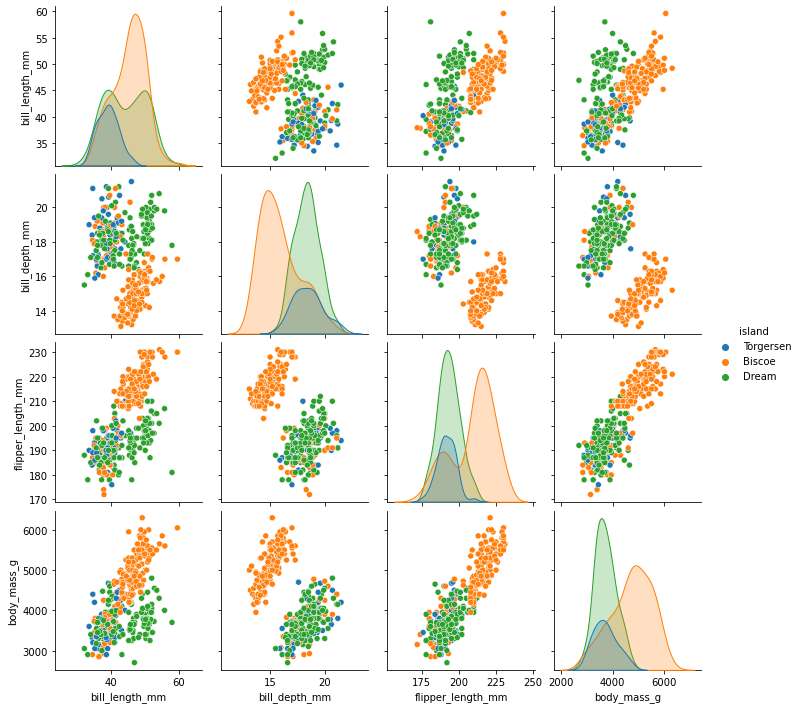

In [263]:
sns.pairplot(penguins, hue='island')

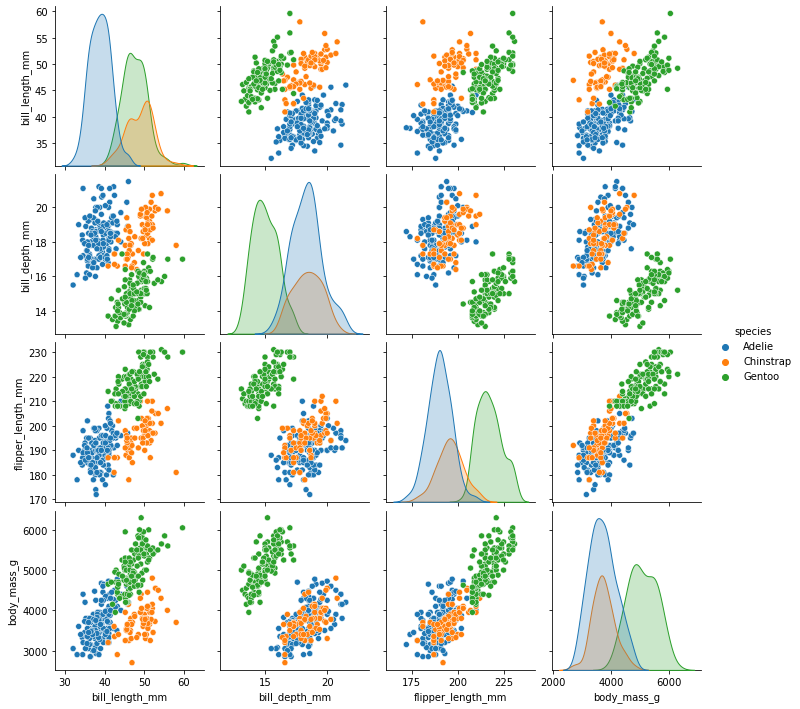

In [141]:
sns.pairplot(penguins, hue='species')

### Task 4
* it seems the species is the importance difference;

* so, Split the data into training and testing sets, ensuring that **the same distribution of species exists in the split data sets as the distribution of species in the original dataframe.**

In [267]:
# because we find species is the importance difference, split test/train based on this

from sklearn.model_selection import StratifiedShuffleSplit

# generator
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # n_splits=1 means the groups of test-train data
# get train test datasets
for train_index, test_index in split.split(penguins, penguins["species"]):  # same porpotion/distribution as the original data's 'species' porportion, on train test sets
    strat_train_set = penguins.iloc[train_index]
    strat_test_set = penguins.iloc[test_index]

In [268]:
# check porportion

In [269]:
strat_train_set.species.value_counts(normalize=True)

Adelie       0.439850
Gentoo       0.357143
Chinstrap    0.203008
Name: species, dtype: float64

In [270]:
strat_test_set.species.value_counts(normalize=True)

Adelie       0.432836
Gentoo       0.358209
Chinstrap    0.208955
Name: species, dtype: float64

In [271]:
penguins.species.value_counts(normalize=True)

Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64

In [272]:
# seems good, similar porpotion

### Task 5
Create a design matrix (`penguins_X`) and a label matrix (`penguins_y`) from the stratified training set.

In [273]:
# set train and test dataset

In [274]:
penguins_X = strat_train_set.drop('flipper_length_mm', axis=1)
penguins_y = strat_train_set['flipper_length_mm'] # label

In [275]:
penguins_X

,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex
268,Gentoo,Biscoe,44.9,13.3,5100.0,Female
205,Chinstrap,Dream,50.7,19.7,4050.0,Male
337,Gentoo,Biscoe,48.8,16.2,6000.0,Male
123,Adelie,Torgersen,41.4,18.5,3875.0,Male
38,Adelie,Dream,37.6,19.3,3300.0,Female
...,...,...,...,...,...,...
24,Adelie,Biscoe,38.8,17.2,3800.0,Male
201,Chinstrap,Dream,49.8,17.3,3675.0,Female
43,Adelie,Dream,44.1,19.7,4400.0,Male
255,Gentoo,Biscoe,48.4,16.3,5400.0,Male


In [276]:
penguins_y

268    213.0
205    203.0
337    222.0
123    202.0
38     181.0
       ...  
24     180.0
201    198.0
43     196.0
255    220.0
70     190.0
Name: flipper_length_mm, Length: 266, dtype: float64

### Task 6
Create a pipeline to apply a `StandardScaler()` to all numeric values and a `OneHotEncoder()` to the categorical variables in `penguins_X`. Assign the resulting matrix to a variable called `penguins_prepared`.

In [277]:
# OneHotEncoder(), same as dummy, convert catogrrical data to num data to do futhur analysis for example, regression;

In [278]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [279]:
# num_attributs and cat_attributs from trainset

num_attributs = penguins_X.select_dtypes(include = np.number).columns
cat_attributs = penguins_X.select_dtypes(exclude = np.number).columns

In [280]:
penguins_X.select_dtypes(include = np.number).columns

Index(['bill_length_mm', 'bill_depth_mm', 'body_mass_g'], dtype='object')

In [281]:
penguins_X.select_dtypes(exclude = np.number).columns

Index(['species', 'island', 'sex'], dtype='object')

In [283]:
# creat pipeline to transform

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attributs),
    ('cat', OneHotEncoder(), cat_attributs),

])

In [284]:
type(full_pipeline) # ColumnTransformer is a type pf pipeline

sklearn.compose._column_transformer.ColumnTransformer

In [285]:
# use pipeline to fit and transform the num data in train, get prepared data

penguins_prepared = full_pipeline.fit_transform(penguins_X) # == fit and transform your data (penguins_X), and also fitted model back

In [286]:
penguins_prepared

array([[ 0.16732502, -1.99231135,  1.08239437, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.22705014,  1.25552054, -0.21564233, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.87989881, -0.52063753,  2.19499725, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.02115604,  1.25552054,  0.21703657, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.80681432, -0.46989015,  1.453262  , ...,  0.        ,
         0.        ,  1.        ],
       [-1.91558298,  0.90028893, -0.77194377, ...,  1.        ,
         1.        ,  0.        ]])

### Task 7
Fit a linear regression to penguins_prepared and penguins_y.

In [287]:
# use preparaed data and label data in train to do linear regression

In [288]:
lin_reg = LinearRegression()

In [289]:
lin_reg.fit(penguins_prepared, penguins_y)

LinearRegression()

In [290]:
# so, we get our fitted model lin_reg

### Task 8
Use the fitted model to show the predicted values for the first 5 rows of data.

In [291]:
# here, we just try to use some data from train data to do traditional prediction(without split train test set) to see/compare results

In [292]:
first_five = penguins_X.iloc[:5]
first_five

,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex
268,Gentoo,Biscoe,44.9,13.3,5100.0,Female
205,Chinstrap,Dream,50.7,19.7,4050.0,Male
337,Gentoo,Biscoe,48.8,16.2,6000.0,Male
123,Adelie,Torgersen,41.4,18.5,3875.0,Male
38,Adelie,Dream,37.6,19.3,3300.0,Female


In [293]:
# use the already fitted model lin_reg to predict

# do not fit data when doing predictions, just transformed that, and predict (but the reg model have been fitted already)

# prediction value
first_five_prepared = full_pipeline.transform(first_five)
lin_reg.predict(first_five_prepared) # get the predict label value

array([215.01468587, 199.35012793, 224.24848666, 194.36658597,
       188.16116242])

In [294]:
# actual value
penguins_y.iloc[:5]

268    213.0
205    203.0
337    222.0
123    202.0
38     181.0
Name: flipper_length_mm, dtype: float64

In [295]:
# seems nice!

### Task 9
Show the mean and standard deviation of the root mean squared error for your model.

In [297]:
# score

In [298]:
from sklearn.model_selection import cross_validate

In [299]:
result = cross_validate(lin_reg, penguins_prepared, penguins_y, scoring="neg_root_mean_squared_error")

In [300]:
np.mean(result['test_score']), np.std(result['test_score'])

(-5.3894684012843275, 0.33018113357734485)

In [301]:
# so far, we still on the training data, not test data yet

### Task 10
Apply your model to the test data (from your train-test split) and report the final root mean squared error (RMSE).

In [303]:
# then, apply to test data

In [304]:
# split test data
penguins_X = strat_test_set.drop('flipper_length_mm', axis=1)
penguins_y = strat_test_set['flipper_length_mm']

In [307]:
# transform 
# do not need fit again, because the model lin_reg is already trained in train

penguins_prepared = full_pipeline.transform(penguins_X)

In [308]:
# predict ...

In [309]:
# score
result = cross_validate(lin_reg, penguins_prepared, penguins_y, scoring="neg_root_mean_squared_error") # need to take neg score because sklearn will take the max mse

In [310]:
np.mean(result['test_score']), np.std(result['test_score'])

(-5.426431815664144, 0.9138705513344562)

In [311]:
-np.mean(result['test_score']) # here, the truth mse need to add a -

5.426431815664144

In [313]:
# means: gonna be wrong by 5.426431815664144cm on average

In [314]:
## every train result will have a little different, it is ok if not totally same with instructors

In [315]:
# check the flipper_length_mm mean value == 200.966967
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [316]:
# 200 compare to 5.426431815664144, not big error,  pretty good prediction!